In [114]:
#import required libraries
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [115]:
#import bands as separate 1 band raster
band4 = rasterio.open('B4.TIF') #red
band5 = rasterio.open('B5.TIF') #nir

In [116]:
#number of raster rows
band4.height

255

In [117]:
#number of raster columns
band4.width

467

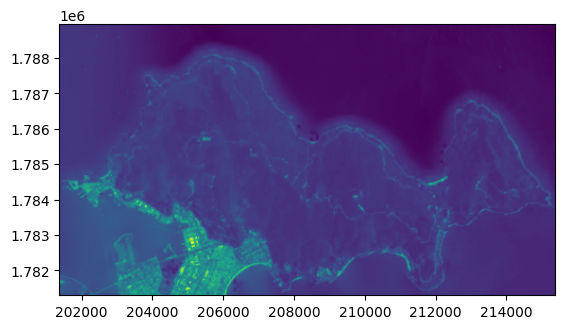

<Axes: >

In [118]:
#plot band 
plot.show(band4)

In [119]:
#type of raster byte
band4.dtypes[0]

'uint16'

In [120]:
#raster sytem of reference
band4.crs

CRS.from_epsg(32649)

In [121]:
#raster transform parameters
band4.transform

Affine(30.0, 0.0, 201375.0,
       0.0, -30.0, 1788945.0)

In [122]:
#raster values as matrix array
band4.read(1)

array([[8624, 8608, 8613, ..., 7245, 7237, 7235],
       [8620, 8607, 8602, ..., 7242, 7253, 7256],
       [8619, 8605, 8599, ..., 7239, 7270, 7254],
       ...,
       [9669, 9674, 9647, ..., 8256, 8240, 8219],
       [9672, 9662, 9657, ..., 8255, 8227, 8257],
       [9657, 9644, 9647, ..., 8232, 8233, 8242]], dtype=uint16)

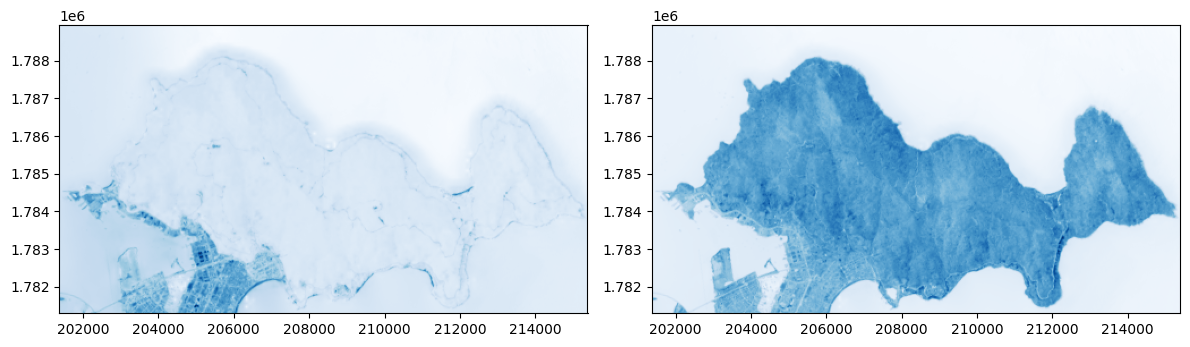

In [123]:
#multiple band representation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plot.show(band4, ax=ax1, cmap='Blues') #red
plot.show(band5, ax=ax2, cmap='Blues') #nir
fig.tight_layout()

In [124]:
#generate nir and red objects as arrays in float64 format
red = band4.read(1).astype('float64')
nir = band5.read(1).astype('float64')

nir

array([[8441., 8411., 8398., ..., 7249., 7245., 7243.],
       [8425., 8409., 8382., ..., 7238., 7262., 7263.],
       [8413., 8404., 8392., ..., 7238., 7264., 7279.],
       ...,
       [9219., 9221., 9221., ..., 8159., 8150., 8155.],
       [9226., 9207., 9205., ..., 8145., 8138., 8219.],
       [9214., 9209., 9204., ..., 8175., 8141., 8185.]])

In [125]:
#ndvi calculation, empty cells or nodata cells are reported as 0
ndvi=np.where(
    (nir+red)==0., 
    0, 
    (nir-red)/(nir+red))
ndvi[:10,:10]

array([[-0.0107237 , -0.0115753 , -0.01263888, -0.01093474, -0.00904074,
        -0.01111046, -0.01051025, -0.01068451, -0.0097475 , -0.01093217],
       [-0.01144031, -0.01163611, -0.01295337, -0.01163884, -0.00985106,
        -0.01015914, -0.01138899, -0.01032985, -0.01021726, -0.0100606 ],
       [-0.01209488, -0.01181727, -0.01218292, -0.0124457 , -0.01106234,
        -0.01145644, -0.0113456 , -0.0100358 , -0.01085872, -0.01177718],
       [-0.01198731, -0.01217289, -0.01095148, -0.01050901, -0.01041423,
        -0.01126761, -0.01179785, -0.0093414 , -0.00873234, -0.01055113],
       [-0.01251984, -0.01244424, -0.01146452, -0.01262997, -0.01020887,
        -0.01002286, -0.01215716, -0.01161972, -0.00992192, -0.01223385],
       [-0.01215003, -0.01201994, -0.01103027, -0.0117495 , -0.01071993,
        -0.01055347, -0.01239791, -0.01162518, -0.0107489 , -0.01130077],
       [-0.01233263, -0.01207361, -0.01248754, -0.01220514, -0.01073125,
        -0.01126893, -0.01180894, -0.0110909 

In [126]:
#export ndvi image
ndviImage = rasterio.open('ndviImage.tiff','w',driver='Gtiff',
                          width=band4.width, 
                          height = band4.height, 
                          count=1, crs=band4.crs, 
                          transform=band4.transform, 
                          dtype='float64')
ndviImage.write(ndvi,1)
ndviImage.close()

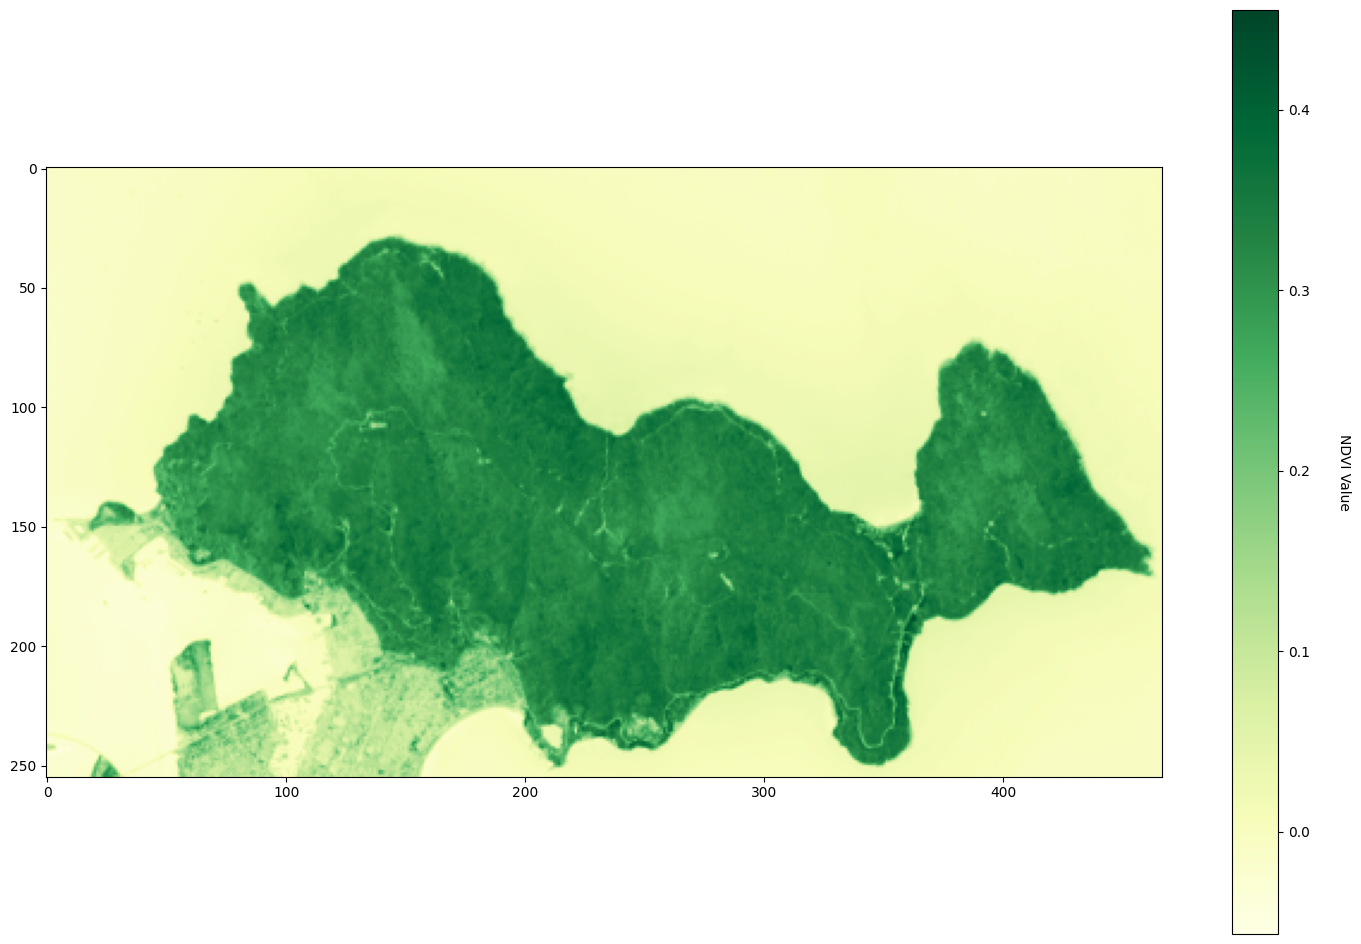

In [127]:
# # plot ndvi
# ndvi = rasterio.open('ndviImage.tiff')
# fig = plt.figure(figsize=(18,12))
# plot.show(ndvi)
# Open the NDVI image
ndvi = rasterio.open('ndviImage.tiff')

# Plot the NDVI image
fig, ax = plt.subplots(figsize=(18, 12))
im = ax.imshow(ndvi.read(1), cmap='YlGn')  # Choose an appropriate colormap

# Add a color bar
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('NDVI Value', rotation=270, labelpad=30)

plt.show()